In [1]:
import numpy as np
from ACNet import ACNet
import gym

STATE_SIZE = 4
ACTION_SIZE = 2
MAX_EPISODE_LENGTH = 100
MAX_EPISODES = 100
GAMMA = .99
GAME = 'CartPole-v0'
GD = {}

class ExplorerFramework(object):
    def __init__(self, access, name, state_size, action_size):
        self.Access = access
        self.AC = ACNet(self.Access, state_size, action_size, name)
        self.env = gym.make(GAME).unwrapped
        self.name = name

    def get_bootstrap(self, done, sess, next_state):
        if done:
            terminal = 0
        else:
            terminal = self.AC.get_value(
                sess, np.expand_dims(next_state, axis=0))[0][0]
        return terminal

    def get_output(self, sess, inputs, actions, targets):
        return self.AC.get_losses(sess, inputs, actions, targets)

    def run(self, sess, max_episodes, t_max= 32):
        episode_score_list = []
        episode = 0
        while episode < max_episodes:
            episode += 1
            episode_socre = self.run_episode(sess, t_max)
            episode_score_list.append(episode_socre)
        GD[str(self.name)] = episode_score_list

    def run_episode(self, sess, t_max= 32):
        t_start = t = 0
        episode_score = 0
        buffer_state = []
        buffer_action = []
        buffer_reward = []

        self.AC.init_network(sess)
        state = self.env.reset()
        while True:
            t += 1
            action = self.AC.action_choose(sess, state)
            next_state, reward, done, info = self.env.step(action)
            # buffer for loop
            episode_score += reward
            buffer_state.append(state)
            buffer_action.append(action)
            buffer_reward.append(reward)
            state = next_state

            if t - t_start == t_max or done:
                t_start = t
                terminal = self.get_bootstrap(done, sess, next_state)

                buffer_target = []
                for r in buffer_reward[::-1]:
                    terminal = r + GAMMA * terminal
                    buffer_target.append(terminal)
                buffer_target.reverse()

                inputs = np.vstack(buffer_state)
                actions = np.squeeze(np.vstack(buffer_action), axis=1)
                targets = np.squeeze(np.vstack(buffer_target), axis=1)
                buffer_state = []
                buffer_action = []
                buffer_reward = []
                # update Access gradients
                self.AC.train_step(sess, inputs, actions, targets)
                # if self.name == 'W0':
                #    print(t, self.get_output(sess, inputs, actions, targets))

                # update local network
                self.AC.init_network(sess)
                #if self.name == 'W0':
                #    print(t, self.get_output(sess, inputs, actions, targets))

            if done or t > MAX_EPISODE_LENGTH:
                if self.name == 'W0':
                    outputs = tuple(self.get_output(sess, inputs, actions, targets))
                    print(t)
                    print('actor: %f, actor_grad: %f, policy mean: %f, policy: %f, entropy: %f, actor_norm: %f, critic: %f, critic_grad: %f, value: %f, critic_norm: %f, value_mean: %f, advantage: %f'%outputs)
                return episode_score


In [2]:
import multiprocessing
import threading
import tensorflow as tf
from Access import Access


NUMS_CPU = multiprocessing.cpu_count()
state_size = 4
action_size = 2
max_episodes = 1000


tf.reset_default_graph()
sess = tf.Session()
with tf.device("/cpu:0"):
    A = Access(state_size, action_size)
    F_list = []
    for i in range(NUMS_CPU):
        F_list.append(ExplorerFramework(A, 'W%i' % i, state_size, action_size))

    COORD = tf.train.Coordinator()
    sess.run(tf.global_variables_initializer())
    sess.graph.finalize()

    threads_list = []
    for ac in F_list:
        job = lambda: ac.run(sess, max_episodes)
        t = threading.Thread(target=job)
        t.start()
        threads_list.append(t)
    COORD.join(threads_list)

graph W0
graph W1
graph W2
graph W3
graph W4
graph W5
graph W6
graph W7
graph W8
graph W9
graph W10
graph W11
graph W12
graph W13
graph W14
graph W15
graph W16
graph W17
graph W18
graph W19
graph W20
graph W21
graph W22
graph W23
graph W24
graph W25
graph W26
graph W27
graph W28
graph W29
graph W30
graph W31
graph W32
graph W33
graph W34
graph W35
graph W36
graph W37
graph W38
graph W39
24
actor: 7.812781, actor_grad: 1.346462, policy mean: 0.693037, policy: 7.791586, entropy: -0.069283, actor_norm: 0.090477, critic: 164.012405, critic_grad: 26.890173, value: 163.078079, critic_norm: 0.934333, value_mean: 0.398911, advantage: 11.193321
17
actor: 5.358743, actor_grad: 1.952462, policy mean: 0.689872, policy: 5.337696, entropy: -0.069310, actor_norm: 0.090356, critic: 81.150177, critic_grad: 20.393137, value: 80.189346, critic_norm: 0.960828, value_mean: 0.795888, advantage: 7.741619
21
actor: 6.225276, actor_grad: 1.391839, policy mean: 0.697941, policy: 6.204336, entropy: -0.069293, ac

101
actor: 43.289288, actor_grad: 287.316284, policy mean: 0.727144, policy: 42.992371, entropy: -0.029011, actor_norm: 0.325928, critic: 2573.041504, critic_grad: 11358.971680, value: 2561.749512, critic_norm: 11.292064, value_mean: 166.449173, advantage: 49.079918
101
actor: 15.738564, actor_grad: 91.434113, policy mean: 0.661996, policy: 15.387138, entropy: -0.021652, actor_norm: 0.373077, critic: 632.651611, critic_grad: 3492.625488, value: 625.324890, critic_norm: 7.326715, value_mean: 72.623169, advantage: 24.475563
101
actor: 5.328609, actor_grad: 21.651194, policy mean: 0.487083, policy: 5.001754, entropy: -0.024983, actor_norm: 0.351838, critic: 111.081131, critic_grad: 772.335022, value: 104.860199, critic_norm: 6.220935, value_mean: 44.270462, advantage: 10.205029
101
actor: 2.889487, actor_grad: 17.949484, policy mean: 0.542589, policy: 2.602755, entropy: -0.026024, actor_norm: 0.312757, critic: 27.009766, critic_grad: 299.540619, value: 20.825941, critic_norm: 6.183824, va

101
actor: -2.969442, actor_grad: 0.534489, policy mean: 0.615711, policy: -3.049716, entropy: -0.048647, actor_norm: 0.128922, critic: 37.398308, critic_grad: 494.143616, value: 31.140106, critic_norm: 6.258201, value_mean: 90.367149, advantage: -4.809926
101
actor: 11.470684, actor_grad: 1.088998, policy mean: 0.542030, policy: 11.397457, entropy: -0.054170, actor_norm: 0.127398, critic: 442.948029, critic_grad: 1555.166504, value: 437.091248, critic_norm: 5.856791, value_mean: 83.941574, advantage: 20.899612
101
actor: 13.778056, actor_grad: 3.442505, policy mean: 0.547646, policy: 13.684822, entropy: -0.047072, actor_norm: 0.140306, critic: 629.837402, critic_grad: 2210.176514, value: 623.327087, critic_norm: 6.510344, value_mean: 97.628799, advantage: 24.862055
101
actor: 1.814640, actor_grad: 0.115733, policy mean: 0.496811, policy: 1.736346, entropy: -0.050441, actor_norm: 0.128736, critic: 22.493610, critic_grad: 326.344482, value: 14.973007, critic_norm: 7.520603, value_mean: 

101
actor: -8.518098, actor_grad: 1.539656, policy mean: 0.476321, policy: -8.578734, entropy: -0.053002, actor_norm: 0.113639, critic: 333.627777, critic_grad: 1760.020630, value: 325.543945, critic_norm: 8.083838, value_mean: 119.750504, advantage: -18.035376
101
actor: -10.845603, actor_grad: 3.667545, policy mean: 0.505678, policy: -10.896858, entropy: -0.055899, actor_norm: 0.107154, critic: 482.948181, critic_grad: 1924.546265, value: 475.630341, critic_norm: 7.317845, value_mean: 109.985931, advantage: -21.677937
101
actor: -5.555051, actor_grad: 5.245319, policy mean: 0.785049, policy: -5.646580, entropy: -0.039377, actor_norm: 0.130906, critic: 56.847332, critic_grad: 612.853027, value: 49.695435, critic_norm: 7.151898, value_mean: 105.702789, advantage: -6.802956
101
actor: 1.137466, actor_grad: 0.446851, policy mean: 0.470137, policy: 1.056939, entropy: -0.050967, actor_norm: 0.131493, critic: 11.578805, critic_grad: 164.380707, value: 5.021988, critic_norm: 6.556817, value_

101
actor: -10.521088, actor_grad: 1.398206, policy mean: 0.515882, policy: -10.571573, entropy: -0.056407, actor_norm: 0.106892, critic: 434.548706, critic_grad: 1978.679810, value: 427.276337, critic_norm: 7.272361, value_mean: 115.425194, advantage: -20.636322
101
actor: -10.067869, actor_grad: 5.679053, policy mean: 0.568328, policy: -10.124904, entropy: -0.052685, actor_norm: 0.109719, critic: 321.169434, critic_grad: 1651.916626, value: 314.487488, critic_norm: 6.681958, value_mean: 105.618057, advantage: -17.616186
101
actor: -1.382292, actor_grad: 0.950964, policy mean: 0.497376, policy: -1.441751, entropy: -0.054224, actor_norm: 0.113684, critic: 16.193361, critic_grad: 223.936737, value: 10.179399, critic_norm: 6.013962, value_mean: 91.785149, advantage: -2.919754
101
actor: 7.751640, actor_grad: 2.353851, policy mean: 0.523436, policy: 7.678938, entropy: -0.048498, actor_norm: 0.121200, critic: 230.251038, critic_grad: 1267.786621, value: 224.359619, critic_norm: 5.891420, v

101
actor: 17.247561, actor_grad: 20.655962, policy mean: 0.722049, policy: 17.057697, entropy: -0.025353, actor_norm: 0.215215, critic: 633.502380, critic_grad: 4753.888184, value: 624.468628, critic_norm: 9.033742, value_mean: 212.104034, advantage: 23.988590
101
actor: -10.350842, actor_grad: 38.962929, policy mean: 0.505456, policy: -10.524597, entropy: -0.035197, actor_norm: 0.208953, critic: 431.807983, critic_grad: 3648.378662, value: 423.506714, critic_norm: 8.301281, value_mean: 194.644165, advantage: -20.517117
101
actor: 35.902809, actor_grad: 172.335159, policy mean: 0.589898, policy: 35.696198, entropy: -0.025636, actor_norm: 0.232245, critic: 3854.581787, critic_grad: 14611.822266, value: 3846.491699, critic_norm: 8.090192, value_mean: 189.585754, advantage: 61.268143
93
actor: -127.167641, actor_grad: 494.677856, policy mean: 1.309348, policy: -127.407608, entropy: -0.018704, actor_norm: 0.258671, critic: 8790.041992, critic_grad: 13196.110352, value: 8783.798828, critic

101
actor: 2.916164, actor_grad: 2.266739, policy mean: 0.444533, policy: 2.650984, entropy: -0.020665, actor_norm: 0.285845, critic: 41.852058, critic_grad: 514.464722, value: 36.835045, critic_norm: 5.017014, value_mean: 34.287659, advantage: 5.642846
101
actor: -11.681026, actor_grad: 44.210686, policy mean: 0.500721, policy: -11.886254, entropy: -0.028704, actor_norm: 0.233933, critic: 579.992920, critic_grad: 2077.594238, value: 574.085144, critic_norm: 5.907761, value_mean: 73.943771, advantage: -23.897121
101
actor: -10.182259, actor_grad: 28.554626, policy mean: 0.447722, policy: -10.335374, entropy: -0.040521, actor_norm: 0.193636, critic: 544.403809, critic_grad: 2084.600098, value: 537.533386, critic_norm: 6.870445, value_mean: 121.093765, advantage: -23.080845
101
actor: -27.785563, actor_grad: 11.244065, policy mean: 0.440894, policy: -27.966156, entropy: -0.033593, actor_norm: 0.214186, critic: 4314.433594, critic_grad: 17859.548828, value: 4304.513672, critic_norm: 9.920

101
actor: 15.117285, actor_grad: 12.231071, policy mean: 0.628721, policy: 14.773716, entropy: -0.017917, actor_norm: 0.361486, critic: 602.796143, critic_grad: 2915.042969, value: 595.969421, critic_norm: 6.826702, value_mean: 117.136978, advantage: 24.144154
100
actor: -56.229427, actor_grad: 1520.642090, policy mean: 0.348986, policy: -56.541836, entropy: -0.028000, actor_norm: 0.340409, critic: 26366.531250, critic_grad: 41177.914062, value: 26359.484375, critic_norm: 7.047041, value_mean: 164.816971, advantage: -162.341843
101
actor: -7.715148, actor_grad: 61.729420, policy mean: 0.464496, policy: -8.037957, entropy: -0.019305, actor_norm: 0.342113, critic: 325.904694, critic_grad: 3547.550049, value: 318.217224, critic_norm: 7.687477, value_mean: 209.156281, advantage: -16.957069
76
actor: -432.303314, actor_grad: 686.580139, policy mean: 1.080734, policy: -432.617310, entropy: -0.018125, actor_norm: 0.332122, critic: 148564.875000, critic_grad: 120985.695312, value: 148553.8593

101
actor: -28.475082, actor_grad: 219.005646, policy mean: 0.363838, policy: -28.773523, entropy: -0.017311, actor_norm: 0.315752, critic: 5313.044434, critic_grad: 23497.990234, value: 5303.193359, critic_norm: 9.850927, value_mean: 390.522949, advantage: -72.140564
101
actor: -60.143238, actor_grad: 51.185829, policy mean: 0.595749, policy: -60.427223, entropy: -0.018047, actor_norm: 0.302033, critic: 11303.388672, critic_grad: 46780.972656, value: 11289.562500, critic_norm: 13.825931, value_mean: 611.162109, advantage: -105.271172
22
actor: -437.671631, actor_grad: 1022.863770, policy mean: 1.098115, policy: -437.966431, entropy: -0.014343, actor_norm: 0.309154, critic: 146133.718750, critic_grad: 83392.906250, value: 146119.062500, critic_norm: 14.653441, value_mean: 391.848053, advantage: -381.114349
31
actor: -540.102356, actor_grad: 1152.977661, policy mean: 1.317163, policy: -540.400024, entropy: -0.015404, actor_norm: 0.313025, critic: 157268.343750, critic_grad: 87457.750000

101
actor: 11.315797, actor_grad: 8.031973, policy mean: 0.774769, policy: 11.221777, entropy: -0.032875, actor_norm: 0.126895, critic: 224.814056, critic_grad: 1728.063354, value: 219.382278, critic_norm: 5.431773, value_mean: 116.719719, advantage: 14.643578
101
actor: -15.260838, actor_grad: 12.777861, policy mean: 0.540765, policy: -15.337757, entropy: -0.049221, actor_norm: 0.126140, critic: 822.369141, critic_grad: 2825.273193, value: 816.766968, critic_norm: 5.602198, value_mean: 122.755653, advantage: -28.556309
101
actor: 0.719130, actor_grad: 1.854391, policy mean: 0.908610, policy: 0.589721, entropy: -0.024467, actor_norm: 0.153876, critic: 6.996808, critic_grad: 96.916931, value: 2.435839, critic_norm: 4.560968, value_mean: 78.977722, advantage: 1.027579
101
actor: 8.687311, actor_grad: 2.769086, policy mean: 0.466085, policy: 8.579222, entropy: -0.044225, actor_norm: 0.152314, critic: 345.158905, critic_grad: 1318.343506, value: 340.516693, critic_norm: 4.642210, value_mea

101
actor: 13.794489, actor_grad: 9.273847, policy mean: 0.687321, policy: 13.715608, entropy: -0.044054, actor_norm: 0.122935, critic: 409.604523, critic_grad: 1441.561890, value: 405.126221, critic_norm: 4.478314, value_mean: 89.282272, advantage: 20.112658
101
actor: 8.684244, actor_grad: 1.790618, policy mean: 0.510978, policy: 8.623693, entropy: -0.054630, actor_norm: 0.115182, critic: 290.828033, critic_grad: 1767.054688, value: 285.985321, critic_norm: 4.842713, value_mean: 106.088135, advantage: 16.758018
101
actor: -2.660032, actor_grad: 1.345795, policy mean: 0.532273, policy: -2.715121, entropy: -0.054862, actor_norm: 0.109951, critic: 32.138149, critic_grad: 609.847961, value: 26.823847, critic_norm: 5.314303, value_mean: 120.949158, advantage: -5.074374
101
actor: 1.524274, actor_grad: 0.438978, policy mean: 0.556234, policy: 1.460035, entropy: -0.050116, actor_norm: 0.114356, critic: 12.445165, critic_grad: 216.865646, value: 7.513114, critic_norm: 4.932051, value_mean: 1

101
actor: 9.843191, actor_grad: 1.172831, policy mean: 0.569208, policy: 9.792437, entropy: -0.051938, actor_norm: 0.102692, critic: 299.917297, critic_grad: 1217.028931, value: 295.439941, critic_norm: 4.477362, value_mean: 88.201828, advantage: 17.187994
101
actor: 9.083299, actor_grad: 5.628703, policy mean: 0.603494, policy: 9.038629, entropy: -0.052487, actor_norm: 0.097158, critic: 231.539429, critic_grad: 1373.108398, value: 226.380859, critic_norm: 5.158572, value_mean: 110.424438, advantage: 14.991093
101
actor: 4.624418, actor_grad: 0.375423, policy mean: 0.530226, policy: 4.578602, entropy: -0.053531, actor_norm: 0.099347, critic: 82.771179, critic_grad: 794.162048, value: 77.704086, critic_norm: 5.067091, value_mean: 110.083015, advantage: 8.547679
101
actor: 3.182430, actor_grad: 0.983039, policy mean: 0.444040, policy: 3.140233, entropy: -0.059478, actor_norm: 0.101674, critic: 55.690956, critic_grad: 732.140991, value: 50.647861, critic_norm: 5.043095, value_mean: 109.9

101
actor: -9.256888, actor_grad: 9.202156, policy mean: 0.562215, policy: -9.332025, entropy: -0.042808, actor_norm: 0.117945, critic: 283.132019, critic_grad: 1827.890625, value: 277.766907, critic_norm: 5.365103, value_mean: 105.903152, advantage: -16.643562
101
actor: -6.281193, actor_grad: 7.513130, policy mean: 0.473593, policy: -6.342237, entropy: -0.050084, actor_norm: 0.111128, critic: 183.803955, critic_grad: 1156.486938, value: 179.012451, critic_norm: 4.791510, value_mean: 92.354080, advantage: -13.344376
101
actor: 5.397619, actor_grad: 1.359295, policy mean: 0.555069, policy: 5.341951, entropy: -0.049886, actor_norm: 0.105554, critic: 97.373291, critic_grad: 677.298157, value: 92.982834, critic_norm: 4.390460, value_mean: 83.673988, advantage: 9.641623
101
actor: 5.678939, actor_grad: 0.840937, policy mean: 0.498599, policy: 5.643462, entropy: -0.057443, actor_norm: 0.092920, critic: 138.777328, critic_grad: 973.992859, value: 133.689209, critic_norm: 5.088123, value_mean

101
actor: 5.231122, actor_grad: 11.396502, policy mean: 0.308545, policy: 5.113538, entropy: -0.041377, actor_norm: 0.158962, critic: 297.503510, critic_grad: 1714.779907, value: 292.728210, critic_norm: 4.775298, value_mean: 88.314301, advantage: 16.921093
101
actor: 2.989613, actor_grad: 9.909412, policy mean: 0.465014, policy: 2.867159, entropy: -0.035196, actor_norm: 0.157650, critic: 46.406849, critic_grad: 534.604553, value: 41.800892, critic_norm: 4.605957, value_mean: 61.366180, advantage: 6.300453
101
actor: -3.370778, actor_grad: 5.653691, policy mean: 0.515427, policy: -3.488439, entropy: -0.036838, actor_norm: 0.154499, critic: 53.324463, critic_grad: 536.131653, value: 48.586384, critic_norm: 4.738081, value_mean: 60.228004, advantage: -6.687629
101
actor: 2.580850, actor_grad: 1.563385, policy mean: 0.357182, policy: 2.478667, entropy: -0.044804, actor_norm: 0.146986, critic: 50.313644, critic_grad: 583.423889, value: 45.783966, critic_norm: 4.529676, value_mean: 56.6394

101
actor: 6.927928, actor_grad: 10.013655, policy mean: 0.469753, policy: 6.861702, entropy: -0.053434, actor_norm: 0.119660, critic: 216.734726, critic_grad: 1085.659058, value: 212.476257, critic_norm: 4.258462, value_mean: 77.266739, advantage: 14.575436
101
actor: 8.635575, actor_grad: 3.298054, policy mean: 0.491026, policy: 8.571613, entropy: -0.052152, actor_norm: 0.116114, critic: 305.493164, critic_grad: 1587.557007, value: 301.040894, critic_norm: 4.452262, value_mean: 83.383530, advantage: 17.256056
101
actor: -4.890660, actor_grad: 2.355746, policy mean: 0.516406, policy: -4.938939, entropy: -0.055430, actor_norm: 0.103708, critic: 94.861557, critic_grad: 1099.939331, value: 89.942307, critic_norm: 4.919252, value_mean: 100.036942, advantage: -9.432587
101
actor: -6.189884, actor_grad: 0.707342, policy mean: 0.542894, policy: -6.233028, entropy: -0.052243, actor_norm: 0.095387, critic: 132.422501, critic_grad: 992.044250, value: 127.739311, critic_norm: 4.683195, value_mea

101
actor: -9.223776, actor_grad: 2.439288, policy mean: 0.379003, policy: -9.363725, entropy: -0.036407, actor_norm: 0.176356, critic: 627.010498, critic_grad: 5243.084961, value: 619.515869, critic_norm: 7.494641, value_mean: 266.181335, advantage: -24.040598
101
actor: -3.703709, actor_grad: 33.538269, policy mean: 0.564092, policy: -3.856819, entropy: -0.032403, actor_norm: 0.185514, critic: 76.892052, critic_grad: 2611.289795, value: 67.480743, critic_norm: 9.411310, value_mean: 404.837402, advantage: -7.737022
101
actor: -8.587219, actor_grad: 60.882656, policy mean: 0.272485, policy: -8.743905, entropy: -0.033388, actor_norm: 0.190074, critic: 1029.118530, critic_grad: 10068.995117, value: 1019.798767, critic_norm: 9.319777, value_mean: 381.501648, advantage: -31.783268
96
actor: -144.385544, actor_grad: 1084.096680, policy mean: 0.382796, policy: -144.563995, entropy: -0.028471, actor_norm: 0.206922, critic: 142852.656250, critic_grad: 137588.890625, value: 142843.281250, criti

101
actor: -1.731980, actor_grad: 29.475061, policy mean: 0.501146, policy: -1.897204, entropy: -0.031330, actor_norm: 0.196555, critic: 319.291962, critic_grad: 903.822388, value: 300.227020, critic_norm: 19.064938, value_mean: 779.292358, advantage: -0.281292
99
actor: -370.778503, actor_grad: 8420.033203, policy mean: 0.416857, policy: -370.962036, entropy: -0.024986, actor_norm: 0.208526, critic: 785145.937500, critic_grad: 615466.437500, value: 785127.562500, critic_norm: 18.382854, value_mean: 888.054688, advantage: -886.068054
101
actor: 8.746913, actor_grad: 104.908478, policy mean: 0.936608, policy: 8.538793, entropy: -0.022900, actor_norm: 0.231021, critic: 654.165833, critic_grad: 5993.126953, value: 639.367676, critic_norm: 14.798141, value_mean: 483.691528, advantage: 13.538541
45
actor: -434.473602, actor_grad: 1022.694763, policy mean: 1.427965, policy: -434.720093, entropy: -0.010497, actor_norm: 0.256999, critic: 94555.007812, critic_grad: 57201.976562, value: 94542.29

101
actor: -2.438082, actor_grad: 3.582566, policy mean: 0.452448, policy: -2.553998, entropy: -0.033302, actor_norm: 0.149217, critic: 34.532478, critic_grad: 495.068359, value: 30.561447, critic_norm: 3.971030, value_mean: 82.166451, advantage: -5.517322
101
actor: 4.336574, actor_grad: 7.096894, policy mean: 0.449338, policy: 4.229632, entropy: -0.036224, actor_norm: 0.143166, critic: 94.612389, critic_grad: 934.971680, value: 90.619133, critic_norm: 3.993253, value_mean: 66.288353, advantage: 9.316996
101
actor: -9.579740, actor_grad: 16.992653, policy mean: 0.556570, policy: -9.680825, entropy: -0.038159, actor_norm: 0.139245, critic: 310.384125, critic_grad: 1400.464478, value: 305.753326, critic_norm: 4.630811, value_mean: 103.414886, advantage: -17.476250
101
actor: -4.665190, actor_grad: 1.169385, policy mean: 0.529968, policy: -4.750090, entropy: -0.046994, actor_norm: 0.131894, critic: 87.663734, critic_grad: 1442.687378, value: 82.450417, critic_norm: 5.213320, value_mean: 

101
actor: 1.256765, actor_grad: 0.158184, policy mean: 0.369234, policy: 1.152130, entropy: -0.042686, actor_norm: 0.147320, critic: 16.676861, critic_grad: 321.132446, value: 11.361542, critic_norm: 5.315320, value_mean: 139.143326, advantage: 3.040817
101
actor: 13.171666, actor_grad: 37.691017, policy mean: 0.661846, policy: 13.052113, entropy: -0.035071, actor_norm: 0.154625, critic: 392.255249, critic_grad: 1853.910522, value: 388.193604, critic_norm: 4.061658, value_mean: 78.330254, advantage: 19.674492
101
actor: 7.288645, actor_grad: 4.173370, policy mean: 0.346100, policy: 7.185361, entropy: -0.045814, actor_norm: 0.149098, critic: 440.969147, critic_grad: 2020.645264, value: 436.950348, critic_norm: 4.018786, value_mean: 86.730515, advantage: 20.769951
101
actor: 6.119115, actor_grad: 8.100822, policy mean: 0.514669, policy: 6.017864, entropy: -0.040760, actor_norm: 0.142011, critic: 144.672409, critic_grad: 1178.215454, value: 140.675522, critic_norm: 3.996890, value_mean: 

101
actor: -3.912689, actor_grad: 4.952168, policy mean: 0.583237, policy: -3.967999, entropy: -0.050997, actor_norm: 0.106307, critic: 50.897961, critic_grad: 603.699036, value: 46.217804, critic_norm: 4.680158, value_mean: 110.659760, advantage: -6.745259
101
actor: -9.237781, actor_grad: 9.006592, policy mean: 0.581351, policy: -9.285240, entropy: -0.054068, actor_norm: 0.101528, critic: 252.448639, critic_grad: 1661.312866, value: 248.148209, critic_norm: 4.300431, value_mean: 107.147552, advantage: -15.654819
101
actor: 5.584533, actor_grad: 6.111345, policy mean: 0.497990, policy: 5.533201, entropy: -0.048878, actor_norm: 0.100209, critic: 125.403679, critic_grad: 1241.109741, value: 121.453857, critic_norm: 3.949823, value_mean: 92.110489, advantage: 11.014714
101
actor: 3.545217, actor_grad: 1.344657, policy mean: 0.515087, policy: 3.501977, entropy: -0.054498, actor_norm: 0.097738, critic: 51.128098, critic_grad: 532.879150, value: 46.715858, critic_norm: 4.412238, value_mean:

101
actor: -5.912608, actor_grad: 4.472682, policy mean: 0.748188, policy: -5.969304, entropy: -0.038409, actor_norm: 0.095105, critic: 76.699394, critic_grad: 659.297119, value: 72.510094, critic_norm: 4.189300, value_mean: 96.803513, advantage: -8.212671
101
actor: 5.201195, actor_grad: 1.939873, policy mean: 0.705468, policy: 5.153058, entropy: -0.048659, actor_norm: 0.096795, critic: 56.896500, critic_grad: 555.528931, value: 52.885841, critic_norm: 4.010660, value_mean: 85.635468, advantage: 7.252380
101
actor: 6.568959, actor_grad: 3.428020, policy mean: 0.558726, policy: 6.526602, entropy: -0.053414, actor_norm: 0.095772, critic: 136.279373, critic_grad: 911.903809, value: 132.101440, critic_norm: 4.177936, value_mean: 97.573708, advantage: 11.414682
101
actor: -0.116854, actor_grad: 0.325501, policy mean: 0.499363, policy: -0.152176, entropy: -0.058201, actor_norm: 0.093523, critic: 5.365396, critic_grad: 27.467192, value: 0.855193, critic_norm: 4.510203, value_mean: 103.381058

101
actor: -9.776531, actor_grad: 53.836132, policy mean: 0.560084, policy: -10.004601, entropy: -0.023907, actor_norm: 0.251976, critic: 319.979095, critic_grad: 2349.145752, value: 313.894012, critic_norm: 6.085082, value_mean: 172.458206, advantage: -17.646130
101
actor: -7.768082, actor_grad: 27.318399, policy mean: 0.363246, policy: -7.976571, entropy: -0.030767, actor_norm: 0.239256, critic: 475.140991, critic_grad: 4479.886230, value: 467.364075, critic_norm: 7.776913, value_mean: 248.665161, advantage: -21.331184
101
actor: 12.721589, actor_grad: 86.673691, policy mean: 0.445496, policy: 12.488158, entropy: -0.025664, actor_norm: 0.259096, critic: 787.819641, critic_grad: 4509.632812, value: 782.028442, critic_norm: 5.791191, value_mean: 158.943314, advantage: 27.382065
101
actor: 5.081697, actor_grad: 5.786814, policy mean: 0.398934, policy: 4.852693, entropy: -0.027532, actor_norm: 0.256536, critic: 167.561142, critic_grad: 1409.960693, value: 162.892334, critic_norm: 4.66880

101
actor: 6.725562, actor_grad: 4.518704, policy mean: 0.436353, policy: 6.670972, entropy: -0.052304, actor_norm: 0.106894, critic: 236.848877, critic_grad: 1333.078369, value: 232.630829, critic_norm: 4.218048, value_mean: 103.572174, advantage: 15.165490
101
actor: -6.463383, actor_grad: 2.242245, policy mean: 0.549779, policy: -6.518364, entropy: -0.048983, actor_norm: 0.103964, critic: 145.999222, critic_grad: 1110.776001, value: 141.274536, critic_norm: 4.724686, value_mean: 123.087616, advantage: -11.881495
101
actor: -8.633711, actor_grad: 5.633884, policy mean: 0.511363, policy: -8.686728, entropy: -0.049964, actor_norm: 0.102981, critic: 294.926239, critic_grad: 1662.469482, value: 290.543335, critic_norm: 4.382901, value_mean: 115.265495, advantage: -17.005854
101
actor: 7.809831, actor_grad: 0.633169, policy mean: 0.499685, policy: 7.755534, entropy: -0.049734, actor_norm: 0.104031, critic: 245.754669, critic_grad: 1625.665894, value: 241.791183, critic_norm: 3.963485, val

101
actor: 8.542212, actor_grad: 6.920823, policy mean: 0.971179, policy: 8.464096, entropy: -0.035041, actor_norm: 0.113156, critic: 82.008102, critic_grad: 638.977173, value: 78.116219, critic_norm: 3.891886, value_mean: 91.531525, advantage: 8.833903
101
actor: 13.091656, actor_grad: 36.082638, policy mean: 0.657825, policy: 13.026882, entropy: -0.048854, actor_norm: 0.113627, critic: 372.267731, critic_grad: 1952.944092, value: 368.059021, critic_norm: 4.208724, value_mean: 104.082695, advantage: 19.098314
101
actor: 0.253927, actor_grad: 1.147507, policy mean: 0.570325, policy: 0.184205, entropy: -0.044704, actor_norm: 0.114426, critic: 5.520391, critic_grad: 21.895573, value: 1.111181, critic_norm: 4.409209, value_mean: 112.198441, advantage: 0.174960
101
actor: -6.919580, actor_grad: 9.052594, policy mean: 0.462706, policy: -6.981237, entropy: -0.049800, actor_norm: 0.111458, critic: 235.337830, critic_grad: 1276.971069, value: 230.982300, critic_norm: 4.355527, value_mean: 108.

101
actor: -7.655245, actor_grad: 2.122994, policy mean: 0.539596, policy: -7.683216, entropy: -0.057251, actor_norm: 0.085221, critic: 207.111923, critic_grad: 1239.900391, value: 202.629547, critic_norm: 4.482370, value_mean: 110.459290, advantage: -14.226692
101
actor: -7.688020, actor_grad: 10.683606, policy mean: 0.722555, policy: -7.741165, entropy: -0.037965, actor_norm: 0.091110, critic: 123.690941, critic_grad: 856.176147, value: 119.540054, critic_norm: 4.150886, value_mean: 99.943283, advantage: -10.866948
101
actor: 3.460280, actor_grad: 4.296030, policy mean: 0.540531, policy: 3.427052, entropy: -0.055692, actor_norm: 0.088920, critic: 45.438156, critic_grad: 590.548645, value: 41.480103, critic_norm: 3.958054, value_mean: 87.902267, advantage: 6.410839
101
actor: 6.601793, actor_grad: 1.028455, policy mean: 0.520140, policy: 6.570340, entropy: -0.056320, actor_norm: 0.087773, critic: 164.034012, critic_grad: 1060.453369, value: 160.154602, critic_norm: 3.879409, value_mea

101
actor: 4.583668, actor_grad: 7.411083, policy mean: 0.563925, policy: 4.534656, entropy: -0.047640, actor_norm: 0.096652, critic: 68.375710, critic_grad: 894.626587, value: 63.903446, critic_norm: 4.472262, value_mean: 119.306023, advantage: 7.889894
101
actor: -6.550009, actor_grad: 5.085865, policy mean: 0.476795, policy: -6.593674, entropy: -0.054964, actor_norm: 0.098628, critic: 196.292801, critic_grad: 2168.239258, value: 191.712311, critic_norm: 4.580495, value_mean: 127.089996, advantage: -13.842281
101
actor: -1.263760, actor_grad: 1.915475, policy mean: 0.593060, policy: -1.311279, entropy: -0.049216, actor_norm: 0.096736, critic: 8.763613, critic_grad: 228.350204, value: 4.747972, critic_norm: 4.015640, value_mean: 99.534668, advantage: -2.039557
101
actor: 7.121590, actor_grad: 8.419964, policy mean: 0.533729, policy: 7.074874, entropy: -0.051554, actor_norm: 0.098269, critic: 185.986206, critic_grad: 1119.277466, value: 181.877991, critic_norm: 4.108220, value_mean: 99

101
actor: 6.386642, actor_grad: 0.827709, policy mean: 0.544345, policy: 6.368337, entropy: -0.060467, actor_norm: 0.078773, critic: 137.930069, critic_grad: 859.855591, value: 133.962845, critic_norm: 3.967224, value_mean: 93.922775, advantage: 11.560709
101
actor: 4.166824, actor_grad: 1.811447, policy mean: 0.537655, policy: 4.147840, entropy: -0.058742, actor_norm: 0.077726, critic: 63.482544, critic_grad: 592.334900, value: 59.379997, critic_norm: 4.102548, value_mean: 100.264908, advantage: 7.646401
101
actor: -2.247309, actor_grad: 0.478203, policy mean: 0.558469, policy: -2.266057, entropy: -0.057163, actor_norm: 0.075911, critic: 21.385994, critic_grad: 349.830566, value: 17.080364, critic_norm: 4.305629, value_mean: 107.955048, advantage: -4.037138
101
actor: -7.855382, actor_grad: 4.149764, policy mean: 0.648167, policy: -7.881938, entropy: -0.050018, actor_norm: 0.076574, critic: 156.504486, critic_grad: 1066.915527, value: 152.156799, critic_norm: 4.347682, value_mean: 10

101
actor: -8.426722, actor_grad: 12.458579, policy mean: 0.503655, policy: -8.512437, entropy: -0.042920, actor_norm: 0.128635, critic: 292.114929, critic_grad: 2903.465332, value: 285.891327, critic_norm: 6.223614, value_mean: 204.575974, advantage: -16.861843
101
actor: 4.427277, actor_grad: 11.973546, policy mean: 0.408838, policy: 4.326197, entropy: -0.044524, actor_norm: 0.145603, critic: 114.078751, critic_grad: 1660.593140, value: 108.447372, critic_norm: 5.631381, value_mean: 176.794388, advantage: 10.282063
36
actor: -631.006226, actor_grad: 630.537476, policy mean: 3.611772, policy: -631.167175, entropy: -0.000379, actor_norm: 0.161299, critic: 31102.523438, critic_grad: 23044.451172, value: 31096.359375, critic_norm: 6.163387, value_mean: 178.782257, advantage: -176.307129
101
actor: 1.933788, actor_grad: 0.709676, policy mean: 0.327204, policy: 1.807515, entropy: -0.040776, actor_norm: 0.167049, critic: 36.697842, critic_grad: 983.437073, value: 30.819302, critic_norm: 5.8

101
actor: 7.193965, actor_grad: 4.074880, policy mean: 0.448794, policy: 7.102475, entropy: -0.047102, actor_norm: 0.138592, critic: 263.839935, critic_grad: 1529.102295, value: 259.326111, critic_norm: 4.513825, value_mean: 109.138718, advantage: 16.033028
101
actor: 9.590431, actor_grad: 8.414597, policy mean: 0.483034, policy: 9.499002, entropy: -0.046909, actor_norm: 0.138337, critic: 409.690643, critic_grad: 2520.380859, value: 405.154999, critic_norm: 4.535639, value_mean: 111.400253, advantage: 19.985125
101
actor: -1.256168, actor_grad: 2.876590, policy mean: 0.531927, policy: -1.344854, entropy: -0.044996, actor_norm: 0.133683, critic: 10.599001, critic_grad: 309.271484, value: 6.479864, critic_norm: 4.119137, value_mean: 90.093857, advantage: -2.488033
101
actor: -2.501627, actor_grad: 9.682954, policy mean: 0.610197, policy: -2.585952, entropy: -0.040494, actor_norm: 0.124819, critic: 22.318169, critic_grad: 388.942383, value: 18.524990, critic_norm: 3.793180, value_mean: 7

101
actor: -6.853883, actor_grad: 3.706650, policy mean: 0.556267, policy: -6.893585, entropy: -0.050105, actor_norm: 0.089807, critic: 157.096588, critic_grad: 1295.503540, value: 152.893707, critic_norm: 4.202877, value_mean: 114.004395, advantage: -12.314435
101
actor: -5.144855, actor_grad: 3.900118, policy mean: 0.623889, policy: -5.182914, entropy: -0.050653, actor_norm: 0.088711, critic: 74.538864, critic_grad: 824.485474, value: 70.407837, critic_norm: 4.131025, value_mean: 110.109955, advantage: -8.317133
101
actor: -0.327040, actor_grad: 0.317946, policy mean: 0.578607, policy: -0.367485, entropy: -0.050739, actor_norm: 0.091184, critic: 5.217268, critic_grad: 44.002499, value: 1.370574, critic_norm: 3.846694, value_mean: 98.843430, advantage: -0.493922
101
actor: 3.921944, actor_grad: 1.223964, policy mean: 0.525435, policy: 3.883768, entropy: -0.054409, actor_norm: 0.092584, critic: 59.227249, critic_grad: 591.259216, value: 55.365456, critic_norm: 3.861795, value_mean: 97.

101
actor: 5.993237, actor_grad: 2.563353, policy mean: 0.492499, policy: 5.945461, entropy: -0.053421, actor_norm: 0.101197, critic: 151.849625, critic_grad: 1081.584473, value: 147.888977, critic_norm: 3.960642, value_mean: 103.863846, advantage: 12.136658
101
actor: -1.208621, actor_grad: 2.085906, policy mean: 0.544797, policy: -1.263466, entropy: -0.045884, actor_norm: 0.100729, critic: 9.574146, critic_grad: 190.159164, value: 5.337640, critic_norm: 4.236507, value_mean: 113.560753, advantage: -2.195293
101
actor: -5.896372, actor_grad: 3.515285, policy mean: 0.647778, policy: -5.949747, entropy: -0.046456, actor_norm: 0.099831, critic: 93.172798, critic_grad: 855.533020, value: 88.955849, critic_norm: 4.216952, value_mean: 114.191101, advantage: -9.331226
101
actor: -7.724795, actor_grad: 1.018218, policy mean: 0.501158, policy: -7.780165, entropy: -0.050395, actor_norm: 0.105764, critic: 249.979187, critic_grad: 1580.476074, value: 245.634033, critic_norm: 4.345148, value_mean:

101
actor: -5.008286, actor_grad: 2.897073, policy mean: 0.524043, policy: -5.187902, entropy: -0.035910, actor_norm: 0.215527, critic: 112.382072, critic_grad: 1533.212280, value: 105.951447, critic_norm: 6.430628, value_mean: 213.264313, advantage: -9.903616
101
actor: -3.643598, actor_grad: 17.220886, policy mean: 0.724972, policy: -3.832526, entropy: -0.025992, actor_norm: 0.214920, critic: 38.655834, critic_grad: 1227.562988, value: 32.199661, critic_norm: 6.456172, value_mean: 238.302322, advantage: -5.605607
101
actor: 8.191926, actor_grad: 3.941004, policy mean: 0.587952, policy: 8.007716, entropy: -0.034247, actor_norm: 0.218457, critic: 209.653870, critic_grad: 2486.499268, value: 203.577362, critic_norm: 6.076511, value_mean: 179.060852, advantage: 13.910124
101
actor: 4.253313, actor_grad: 11.588011, policy mean: 0.781700, policy: 4.062903, entropy: -0.029111, actor_norm: 0.219522, critic: 66.944473, critic_grad: 1202.482178, value: 61.131237, critic_norm: 5.813236, value_m

In [3]:
import pandas as pd
import seaborn as sns
%matplotlib inline

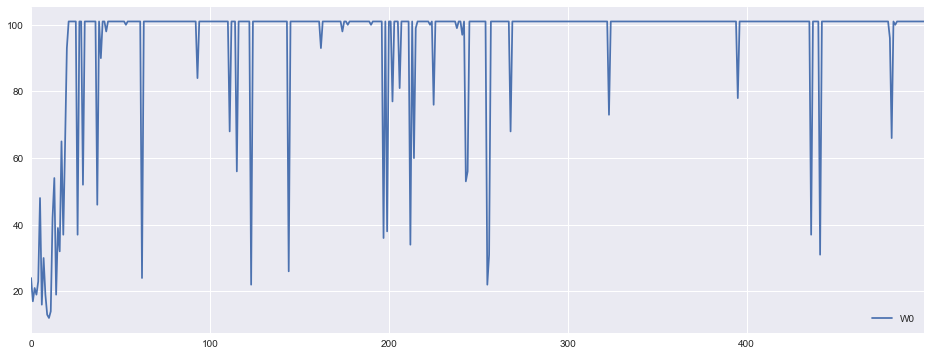

In [4]:
tmp = pd.DataFrame(GD)
tmp.iloc[:500,:1].plot(figsize=(16,6))

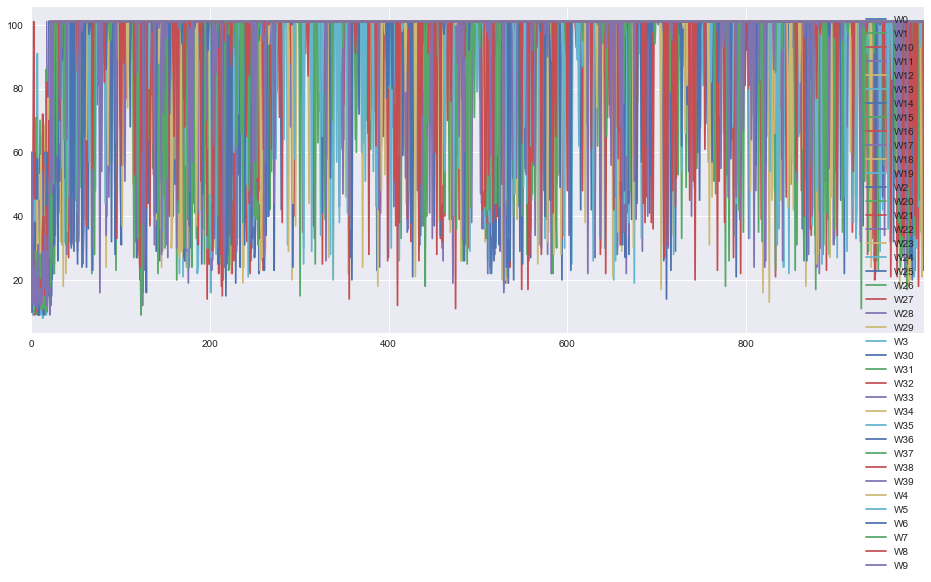

In [5]:
tmp = pd.DataFrame(GD)
tmp.plot(figsize=(16,6))